# Creating DEM backdrop

We have all the variables, but to show their relation to elevation, we need to overlay them on to a DEM. This will be a contour map. To start, let's define the libraries we'll need:

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

open the NC file as a dataset through x-array. and extract the elevation data from the dataset:

In [ ]:
ds = xr.open_dataset("../../../topo.nc")
ds

In [14]:
dem = ds.dem
dem

<xarray.DataArray 'dem' (y: 17002, x: 17569)>
array([[2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 , 2137.6157],
       [2633.369 , 2635.3313, 2635.3313, ..., 2137.585 , 2137.585 , 2137.6157],
       [2634.1025, 2637.2336, 2637.2336, ..., 2139.121 , 2139.121 , 2138.9734],
       ...,
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907, 3062.4495],
       [1585.9766, 1580.0369, 1580.0369, ..., 3063.1907, 3063.1907, 3062.4495],
       [1587.6707, 1582.0449, 1582.0449, ..., 3064.8484, 3064.8484, 3064.3577]],
      dtype=float32)
Coordinates:
  * y        (y) float32 4230327.0 4230324.0 4230321.0 ... 4179327.0 4179324.0
  * x        (x) float32 254007.0 254010.0 254013.0 ... 306708.0 306711.0
Attributes:
    long_name:     dem
    grid_mapping:  projection

### What data are we trying to overlay?

DEM spatial plot

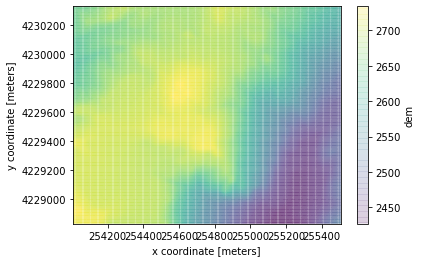

In [4]:
dem.isel(x=slice(0, 500), y=slice(0,500)).plot(alpha=0.1)

In [5]:
# multiple file open snowdepth
# combine with DEM??
# use snowdepth time series to interpolate years 2015 and 2017
# generate and plot contour map of DEM
# plot 2015 and 2017 data in separate subplots (and/or subtract to find anomaly difference), overlaying contour map 

DEM contour

<a list of 75 text.Text objects>

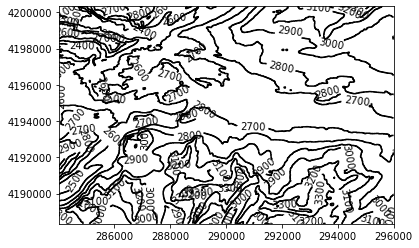

In [6]:
fig, ax = plt.subplots()
levels = np.arange(0, 4000, 100)

contours = ax.contour(dem.x.isel(x=slice(10000,14000)), dem.y.isel(y=slice(10000,14000)), dem.isel(x=slice(10000,14000), y=slice(10000,14000)), levels=levels, colors='k')

ax.clabel(contours, fmt='%1.0f')

### Example Result

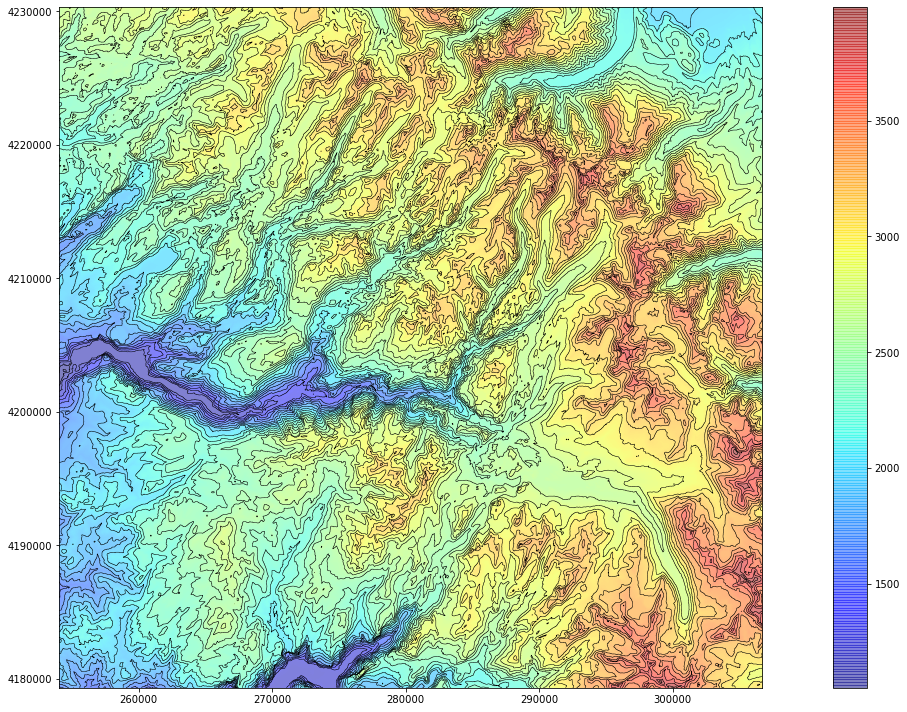

In [9]:
# superimposing two data layers
plt.figure(figsize=(20,10))

#x = dem.x.isel(x=slice(10000,17000))
#y = dem.y.isel(y=slice(10000,17000))
#z = dem.isel(x=slice(10000,17000), y=slice(10000,17000))

contours = plt.contour(dem.x, dem.y, dem, colors='k', levels=levels, linewidths=0.5)
plt.imshow(dem, extent=[np.min(dem.x), np.max(dem.x), np.min(dem.y), np.max(dem.y)], alpha=0.5, cmap='jet')

plt.colorbar()
plt.tight_layout()
plt.savefig('./figures/dem_contour_100.png')
#plt.clabel(contours, fmt='%1.0f')